### Roc Curves

In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import load_model

In [2]:
Path     =  'D:/cancer de pele/validação/0-validacao.pckl'
f = open(Path, 'rb')
[X,Y] = pickle.load(f)
Y = np.array(Y)

# DE OLHO NO i para mudar endereço

Evaluate on test data
11/11 [==============================] - 14s 1s/step - loss: 0.4837 - accuracy: 0.5271
test loss, test acc: [0.48367103934288025, 0.5271428823471069]
Generate predictions for 3 samples
predictions shape: (700, 7)
Evaluate on test data
11/11 [==============================] - 11s 976ms/step - loss: 0.4842 - accuracy: 0.4743
test loss, test acc: [0.4841732382774353, 0.47428572177886963]
Generate predictions for 3 samples
predictions shape: (700, 7)
Evaluate on test data
11/11 [==============================] - 10s 845ms/step - loss: 0.5896 - accuracy: 0.5300
test loss, test acc: [0.5895573496818542, 0.5299999713897705]
Generate predictions for 3 samples
predictions shape: (700, 7)
Evaluate on test data
11/11 [==============================] - 12s 888ms/step - loss: 0.4390 - accuracy: 0.5629
test loss, test acc: [0.438984215259552, 0.5628571510314941]
Generate predictions for 3 samples
predictions shape: (700, 7)
Evaluate on test data
11/11 [=========================

<ipython-input-3-54a2bd9e14c5>:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Evaluate on test data
11/11 [==============================] - 9s 838ms/step - loss: 0.3820 - accuracy: 0.6243
test loss, test acc: [0.38198286294937134, 0.6242856979370117]
Generate predictions for 3 samples
predictions shape: (700, 7)
OLHAA AQUIIII JA FORAMMM: 17
Evaluate on test data
11/11 [==============================] - 9s 841ms/step - loss: 0.7487 - accuracy: 0.3729
test loss, test acc: [0.7486624717712402, 0.37285715341567993]
Generate predictions for 3 samples
predictions shape: (700, 7)
Evaluate on test data
11/11 [==============================] - 11s 937ms/step - loss: 0.4883 - accuracy: 0.5657
test loss, test acc: [0.4883318245410919, 0.5657142996788025]
Generate predictions for 3 samples
predictions shape: (700, 7)
Evaluate on test data
11/11 [==============================] - 13s 992ms/step - loss: 0.4172 - accuracy: 0.5329
test loss, test acc: [0.4172340929508209, 0.5328571200370789]
Generate predictions for 3 samples
predictions shape: (700, 7)
Evaluate on test data
1

OSError: SavedModel file does not exist at: D:/cancer de pele/modelo/21/ModelCancer-0.h5/{saved_model.pbtxt|saved_model.pb}

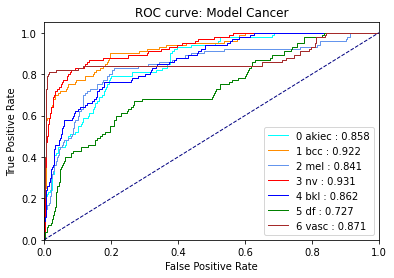

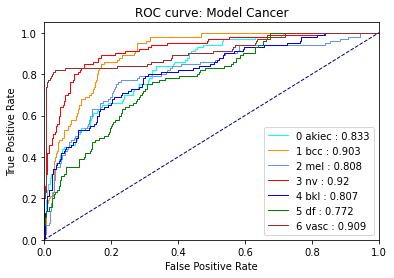

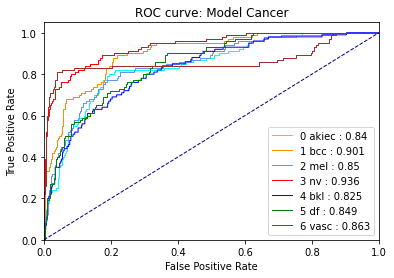

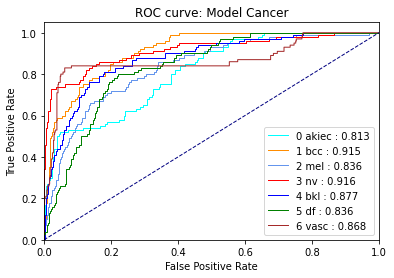

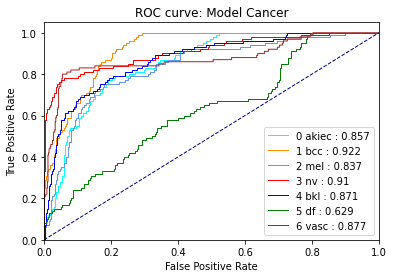

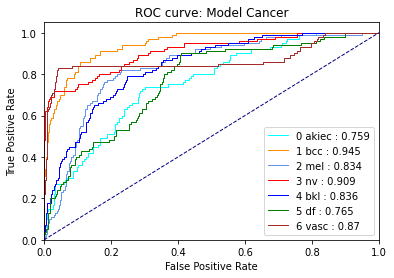

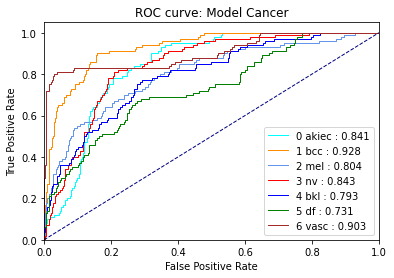

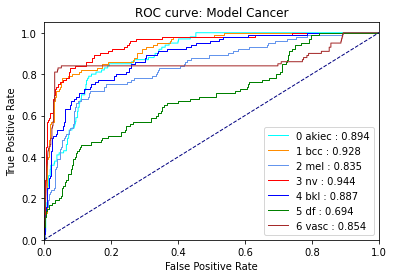

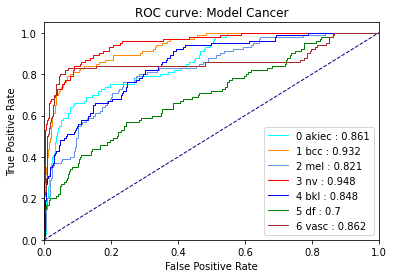

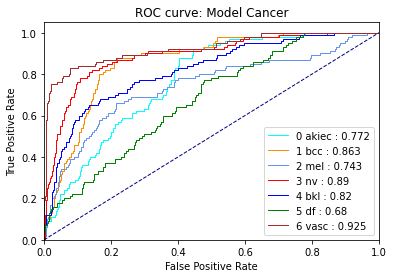

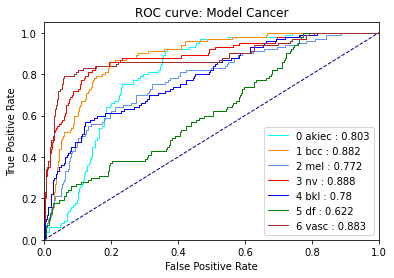

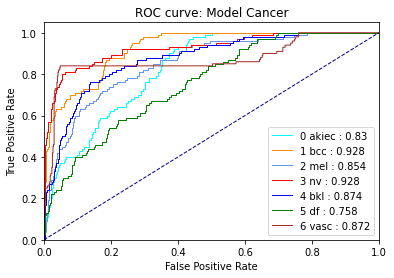

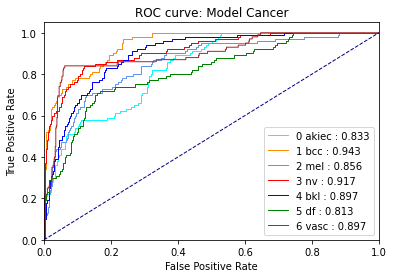

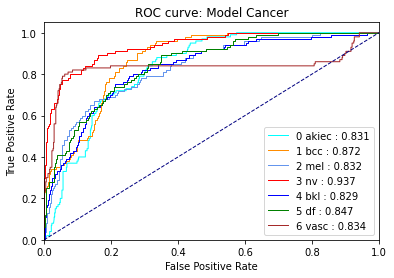

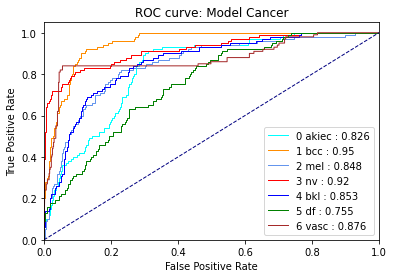

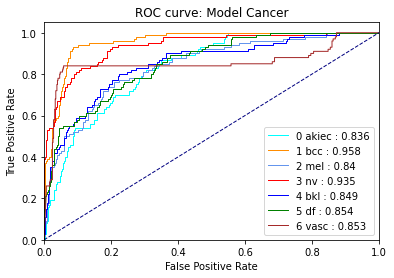

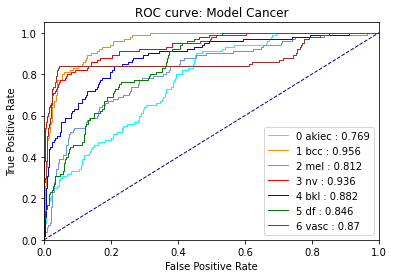

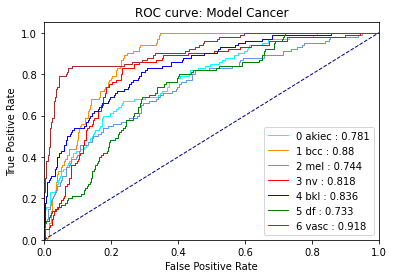

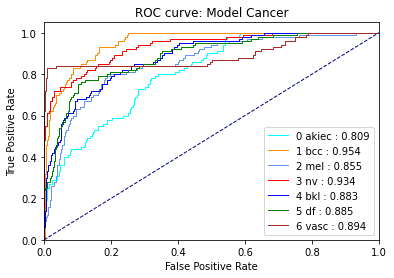

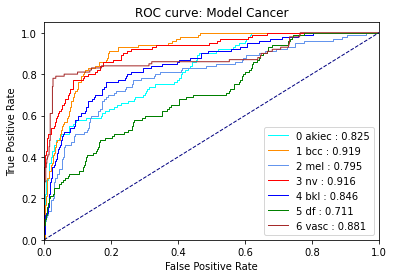

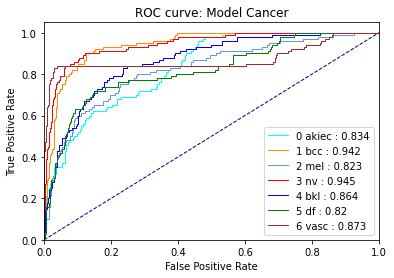

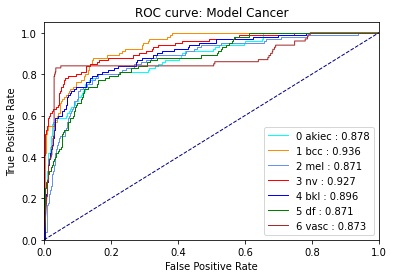

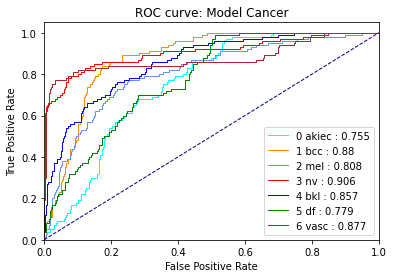

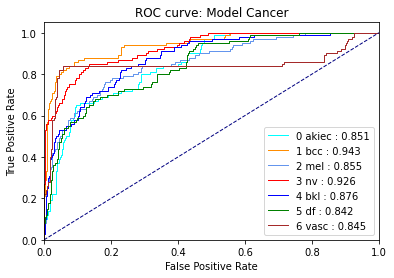

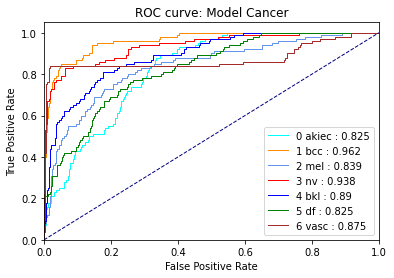

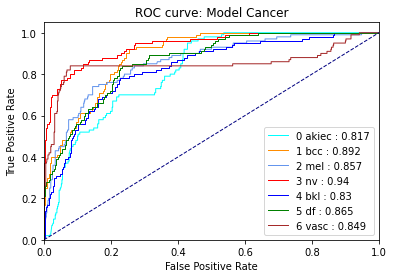

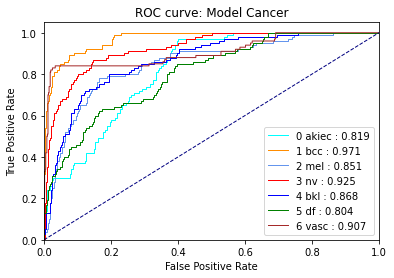

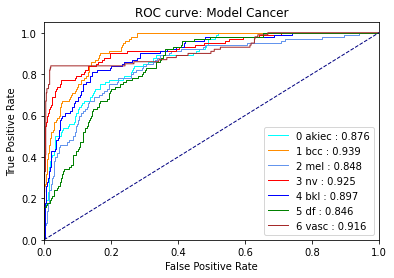

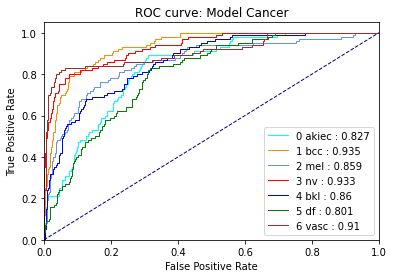

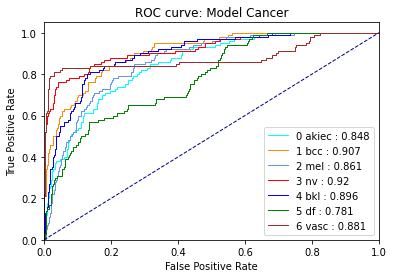

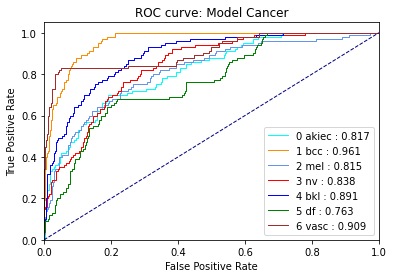

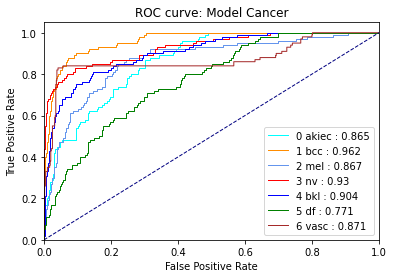

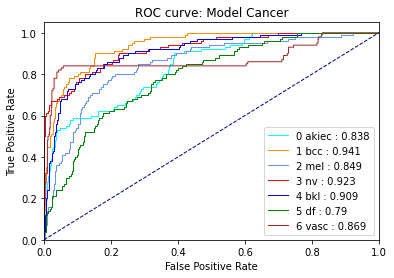

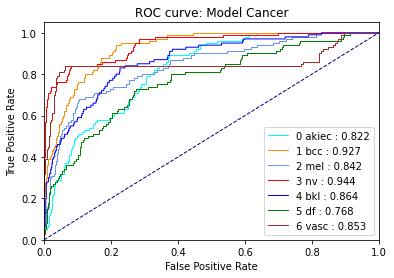

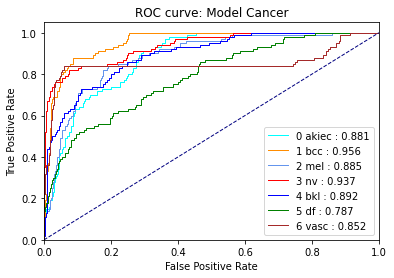

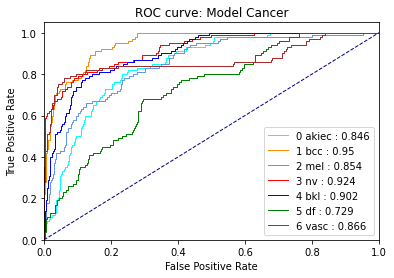

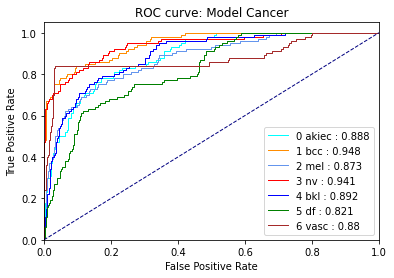

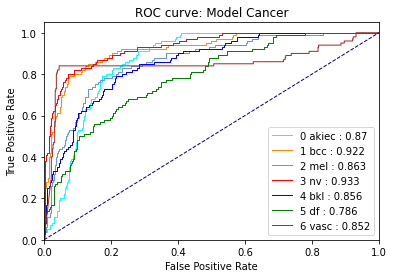

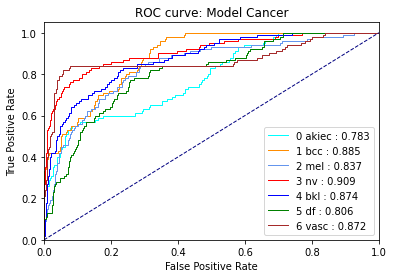

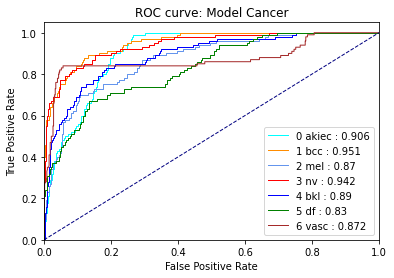

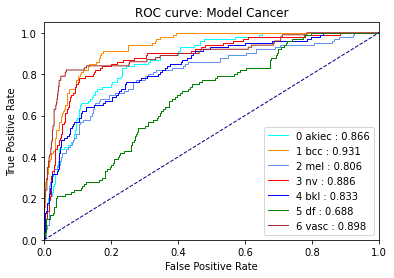

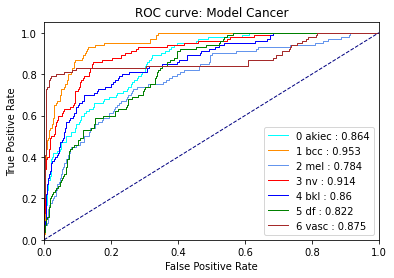

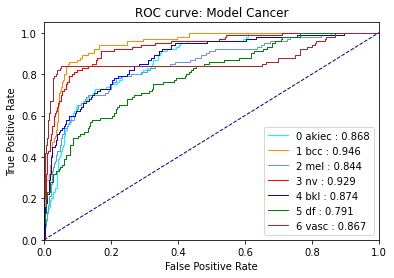

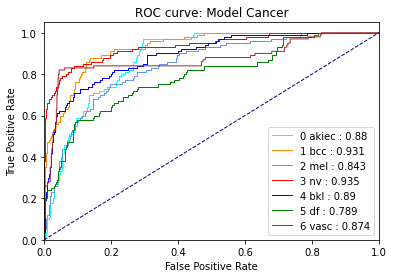

In [3]:
for i in range(16,21):
    
    for j in range(11):
        #load model
        modelpath = 'D:/cancer de pele/modelo/' + str(i+1) + '/ModelCancer-' + str(j) + '.h5'
        ModelCancer = load_model(modelpath)

        # Evaluate the model on the test data using `evaluate`
        print("Evaluate on test data")
        results = ModelCancer.evaluate(X, Y, batch_size = 64)
        print("test loss, test acc:", results)

        # Generate predictions (probabilities -- the output of the last layer)
        # on new data using `predict`
        print("Generate predictions for 3 samples")
        pred = ModelCancer.predict(X[:])
        print("predictions shape:", pred.shape)

        from sklearn.metrics import roc_auc_score, roc_curve, auc
        fpr0, tpr0, thresholds0 = roc_curve(Y[:,0], pred[:,0])
        fpr1, tpr1, thresholds1 = roc_curve(Y[:,1], pred[:,1])
        fpr2, tpr2, thresholds2 = roc_curve(Y[:,2], pred[:,2])
        fpr3, tpr3, thresholds3 = roc_curve(Y[:,3], pred[:,3])
        fpr4, tpr4, thresholds4 = roc_curve(Y[:,4], pred[:,4])
        fpr5, tpr5, thresholds5 = roc_curve(Y[:,5], pred[:,5])
        fpr6, tpr6, thresholds6 = roc_curve(Y[:,6], pred[:,6])


        roc_auc0 = auc(fpr0, tpr0)
        roc_auc1 = auc(fpr1, tpr1)
        roc_auc2 = auc(fpr2, tpr2)
        roc_auc3 = auc(fpr3, tpr3)
        roc_auc4 = auc(fpr4, tpr4)
        roc_auc5 = auc(fpr5, tpr5)
        roc_auc6 = auc(fpr6, tpr6)


        plt.figure()
        lw = 1
        colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'blue',
                  'green','brown', 'orange', 'yellow', 'turquoise',
                  'purple', 'gold', 'black', 'pink', 'silver']
        #plt.figure(figsize = (30,20))
        plt.plot(fpr0, tpr0  , color=colors[0],lw=lw, label='0'+' akiec : '+str(round(roc_auc0,3)))
        plt.plot(fpr1, tpr1  , color=colors[1],lw=lw, label='1'+' bcc : '+str(round(roc_auc1,3)))
        plt.plot(fpr2, tpr2  , color=colors[2],lw=lw, label='2'+' mel : '+str(round(roc_auc2,3)))
        plt.plot(fpr3, tpr3  , color=colors[3],lw=lw, label='3'+' nv : '+str(round(roc_auc3,3)))
        plt.plot(fpr4, tpr4  , color=colors[4],lw=lw, label='4'+' bkl : '+str(round(roc_auc4,3)))
        plt.plot(fpr5, tpr5  , color=colors[5],lw=lw, label='5'+' df : '+str(round(roc_auc5,3)))
        plt.plot(fpr6, tpr6  , color=colors[6],lw=lw, label='6'+' vasc : '+str(round(roc_auc6,3)))


        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve: Model Cancer')
        plt.legend(loc="lower right")
        #plt.rcParams.update({'font.size': 20})
        plt.savefig('D:/cancer de pele/ROC/' + str(i) + '/ROC_T' + str(i) + '-M'+ str(j) +'.png', format='png')

    print("OLHAA AQUIIII JA FORAMMM: " + str(i) )


In [ ]:
# load model
ModelCancer = load_model('C:/Users/MADEIRA/Pictures/DATA CANCER/modelo/cancer' + str(4) + '/ModelCancer-' + str(8) + '.h5')

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = ModelCancer.evaluate(X, Y, batch_size = 64)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
pred = ModelCancer.predict(X[:])
print("predictions shape:", pred.shape)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
fpr0, tpr0, thresholds0 = roc_curve(Y[:,0], pred[:,0])
fpr1, tpr1, thresholds1 = roc_curve(Y[:,1], pred[:,1])
fpr2, tpr2, thresholds2 = roc_curve(Y[:,2], pred[:,2])
fpr3, tpr3, thresholds3 = roc_curve(Y[:,3], pred[:,3])
fpr4, tpr4, thresholds4 = roc_curve(Y[:,4], pred[:,4])
fpr5, tpr5, thresholds5 = roc_curve(Y[:,5], pred[:,5])
fpr6, tpr6, thresholds6 = roc_curve(Y[:,6], pred[:,6])


roc_auc0 = auc(fpr0, tpr0)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)
roc_auc6 = auc(fpr6, tpr6)


In [ ]:
plt.figure()
lw = 1
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'blue',
          'green','brown', 'orange', 'yellow', 'turquoise',
          'purple', 'gold', 'black', 'pink', 'silver']
#plt.figure(figsize = (30,20))
plt.plot(fpr0, tpr0  , color=colors[0],lw=lw, label='0'+' akiec : '+str(round(roc_auc0,3)))
plt.plot(fpr1, tpr1  , color=colors[1],lw=lw, label='1'+' bcc : '+str(round(roc_auc1,3)))
plt.plot(fpr2, tpr2  , color=colors[2],lw=lw, label='2'+' mel : '+str(round(roc_auc2,3)))
plt.plot(fpr3, tpr3  , color=colors[3],lw=lw, label='3'+' nv : '+str(round(roc_auc3,3)))
plt.plot(fpr4, tpr4  , color=colors[4],lw=lw, label='4'+' bkl : '+str(round(roc_auc4,3)))
plt.plot(fpr5, tpr5  , color=colors[5],lw=lw, label='5'+' df : '+str(round(roc_auc5,3)))
plt.plot(fpr6, tpr6  , color=colors[6],lw=lw, label='6'+' vasc : '+str(round(roc_auc6,3)))


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: Model Cancer')
plt.legend(loc="lower right")
#plt.rcParams.update({'font.size': 20})
plt.savefig('C:/Users/MADEIRA/Pictures/DATA CANCER/ROC/ROC' + str (0.1) + '.png', format='png')
plt.show()